In [1]:
import geopandas as gpd

In [2]:
import json

# Replace with the path to your JSON file
json_file = 'SIP_CASA_0616.json'

# Open and load the JSON file
with open(json_file, 'r') as file:
    data = json.load(file)

data


[{'source': 'E01000001',
  'target': 'E01000001',
  'SIP_bi': 1.0,
  'SIP_pt': 1.0,
  'SIP_dr': 1.0},
 {'source': 'E01000001',
  'target': 'E01000002',
  'SIP_bi': 0.9631458936328678,
  'SIP_pt': 0.8789629730733941,
  'SIP_dr': 0.8707183731139179},
 {'source': 'E01000001',
  'target': 'E01000003',
  'SIP_bi': 0.9935792502079501,
  'SIP_pt': 0.9213699128733592,
  'SIP_dr': 0.9807630606695168},
 {'source': 'E01000001',
  'target': 'E01000005',
  'SIP_bi': 0.8887174024390361,
  'SIP_pt': 0.8445066235962299,
  'SIP_dr': 0.7096064472760542},
 {'source': 'E01000001',
  'target': 'E01000139',
  'SIP_bi': 0.0938673085364988,
  'SIP_pt': 0.07641211128551605,
  'SIP_dr': 0.40512511101168963},
 {'source': 'E01000001',
  'target': 'E01000141',
  'SIP_bi': 0.05395116983175004,
  'SIP_pt': 0.2056385874716592,
  'SIP_dr': 0.38813892670958},
 {'source': 'E01000001',
  'target': 'E01000143',
  'SIP_bi': 0.07843087528582204,
  'SIP_pt': 0.14905176793527303,
  'SIP_dr': 0.3625159771224728},
 {'source': '

In [3]:
import geopandas as gpd
import os
import glob
import pandas as pd
# Path where all shapefiles are located
shapefile_dir = "geo"  # Replace with your directory path
output_geojson = "aggregated.geojson"

# Collect all shapefile paths
shapefiles = glob.glob(os.path.join(shapefile_dir, "*.shp"))

# Read and concatenate all shapefiles into a single GeoDataFrame
gdfs = []
for shp in shapefiles:
    gdf = gpd.read_file(shp).to_crs("EPSG:4326")  # Convert CRS to WGS84
    gdfs.append(gdf)

# Combine into a single GeoDataFrame
combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

# Save to GeoJSON
combined_gdf.to_file(output_geojson, driver='GeoJSON')

print(f"Saved aggregated GeoJSON to {output_geojson}")


Saved aggregated GeoJSON to aggregated.geojson


Clipping completed and saved as 'small_london.geojson'


<Axes: >

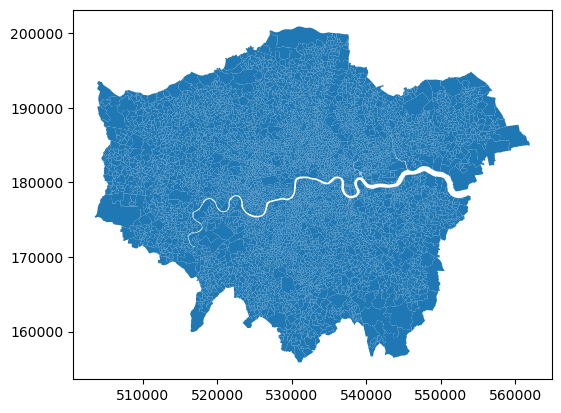

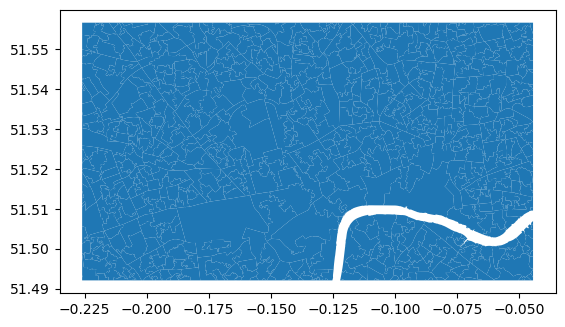

In [16]:
gdf = gpd.read_file("bfcs_london.geojson")
gdf.plot()
import geopandas as gpd
from shapely.geometry import box

# Load the GeoJSON file
gdf = gpd.read_file("bfcs_london.geojson")
gdf = gdf.to_crs(epsg=4326)

# Define the bounding box
xmin, ymin, xmax, ymax = -0.225978, 51.492064, -0.044407, 51.556629
bbox = box(xmin, ymin, xmax, ymax)

# Create a GeoDataFrame for the bbox
bbox_gdf = gpd.GeoDataFrame([{'geometry': bbox}], crs=gdf.crs)

# Clip the original GeoDataFrame to the bbox
clipped_gdf = gpd.clip(gdf, bbox_gdf)

# Save the clipped result to a new GeoJSON file
clipped_gdf.to_file("small_london.geojson", driver="GeoJSON")

print("Clipping completed and saved as 'small_london.geojson'")
clipped_gdf.plot()

In [17]:
clipped_gdf

,label,lsoa21cd,lsoa21nm,name,msoa21cd,geometry
3293,E92000001E12000007E09000022E02000619E01003108,E01003108,Lambeth 002B,Lambeth 002B,E02000619,"MULTIPOLYGON (((-0.10727 51.49218, -0.10726 51..."
929,E92000001E12000007E09000022E02000619E01003111,E01003111,Lambeth 002D,Lambeth 002D,E02000619,"POLYGON ((-0.11482 51.49214, -0.11415 51.49223..."
197,E92000001E12000007E09000022E02000619E01003112,E01003112,Lambeth 002E,Lambeth 002E,E02000619,"POLYGON ((-0.11965 51.494, -0.11962 51.494, -0..."
645,E92000001E12000007E09000028E02000818E01033877,E01033877,Southwark 012I,Southwark 012I,E02000818,"POLYGON ((-0.09407 51.49208, -0.09391 51.49215..."
443,E92000001E12000007E09000028E02000820E01032639,E01032639,Southwark 014F,Southwark 014F,E02000820,"POLYGON ((-0.09959 51.49208, -0.09959 51.49209..."
...,...,...,...,...,...,...
2734,E92000001E12000007E09000012E02000353E01001832,E01001832,Hackney 009E,Hackney 009E,E02000353,"MULTIPOLYGON (((-0.07182 51.55654, -0.07175 51..."
3458,E92000001E12000007E09000012E02000354E01033703,E01033703,Hackney 010F,Hackney 010F,E02000354,"POLYGON ((-0.05509 51.55571, -0.05504 51.55564..."
2618,E92000001E12000007E09000012E02000359E01001789,E01001789,Hackney 015C,Hackney 015C,E02000359,"POLYGON ((-0.04445 51.55383, -0.04447 51.55386..."
2735,E92000001E12000007E09000012E02000355E01001794,E01001794,Hackney 011C,Hackney 011C,E02000355,"POLYGON ((-0.04955 51.55661, -0.04991 51.55659..."


In [11]:
import geopandas as gpd

# Assuming you already have a GeoDataFrame (gdf)
# Replace with your desired output file path
geojson_path = 'camden.geojson'

# Save the GeoDataFrame as a GeoJSON file
gdf.to_file(geojson_path, driver='GeoJSON')

import geopandas as gpd
from shapely.geometry import Point


# Ensure the data is in the correct coordinate reference system (CRS)
gdf = gdf.to_crs("EPSG:4326")

# Calculate the centroids of the geometries in the GeoDataFrame
gdf['centroid'] = gdf.geometry.centroid

# Calculate the mean x and y coordinates of the centroids
mean_x = gdf['centroid'].x.mean()
mean_y = gdf['centroid'].y.mean()

# The mean centroid is the point with mean_x and mean_y
mean_centroid = Point(mean_x, mean_y)

# Create a GeoDataFrame to store the mean centroid
mean_centroid_gdf = gpd.GeoDataFrame(geometry=[mean_centroid], crs=gdf.crs)

# View the mean centroid
print("Mean Centroid:", mean_centroid_gdf)


Mean Centroid:                     geometry
0  POINT (-0.11713 51.50247)


/var/folders/2w/9xqgx8zx23x0sxltmvyhdk2h0000gn/T/ipykernel_4101/3685293755.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid


In [ ]:
mean_centroid_gdf.plot()